# importing Data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# data collection & analysis

In [50]:
# loading the data from csv filr to a pandas dataframe

insurance_dataset = pd.read_csv(r"C:\Users\dell\Desktop\Data Science Diploma\Project 11. Medical Insurance Cost Prediction using Machine Learning with Python\archive(1)\insurance.csv")

In [51]:
#printing 5 rows of data frame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
# number of rows and cols
insurance_dataset.shape

(1338, 7)

In [53]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#### categorical features
- sex
- Smoker
- region

In [55]:
#check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis


In [56]:
# statistical Measures od Dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


D:\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'age distribution')

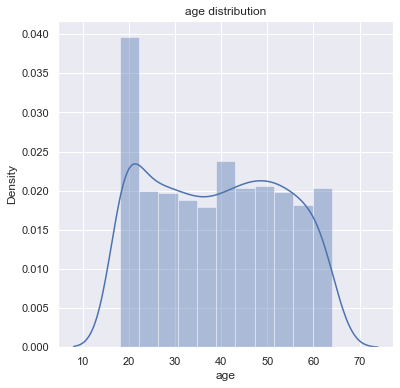

In [57]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['age']);
plt.title('age distribution')

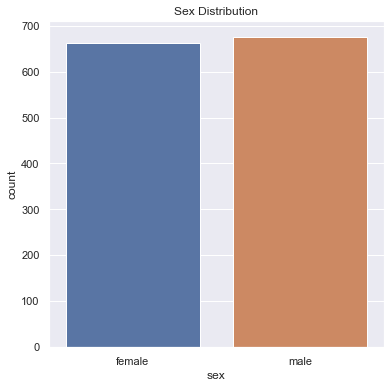

In [58]:
# distribution for gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution');

D:\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

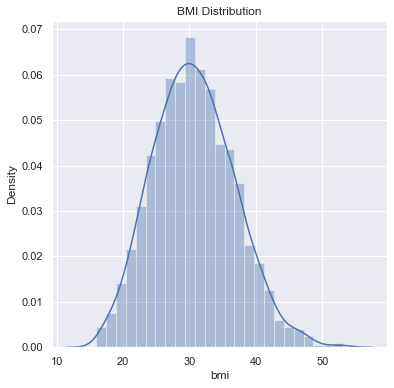

In [59]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')

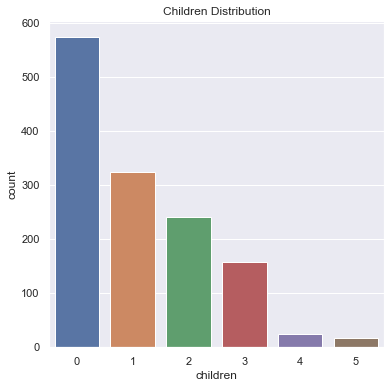

In [60]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children Distribution');

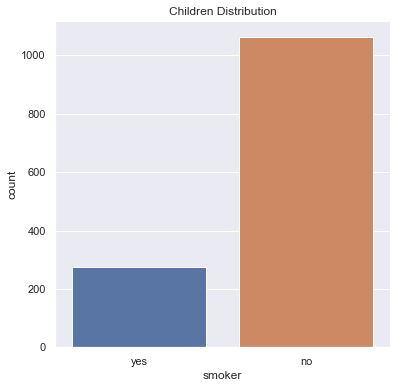

In [61]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Children Distribution');

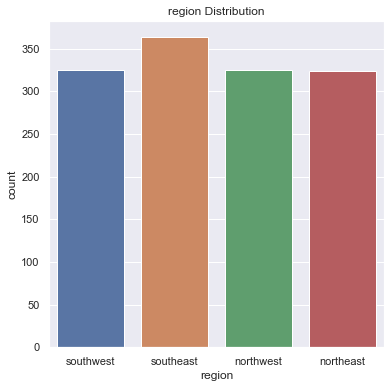

In [62]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region Distribution');

D:\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


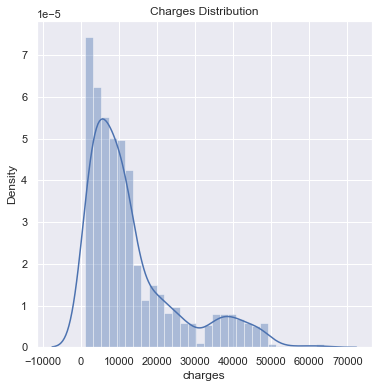

In [63]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution');

In [64]:
# EnCoding the Categorical Features
#using replace
insurance_dataset.replace({'sex':{'female':0,'male':1}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace =True)

In [74]:
X =insurance_dataset.drop(insurance_dataset[-2] ,axis=1)
Y =insurance_dataset['charges']
X.head()

KeyError: -2

In [66]:
X_train ,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [67]:
#model
reg = LinearRegression()

In [68]:
reg.fit(X_train,Y_train)

LinearRegression()

In [69]:
t_d_p = reg.predict(X_train)

In [70]:
r2_train = metrics.r2_score(Y_train,t_d_p)
print('R squared value: ' , r2_train)

R squared value:  0.751505643411174


In [71]:
 input_pred = np.asarray((31,1,25.74,0,1,0))

In [72]:
PRED =  reg.predict(input_pred.reshape(1,-1))

D:\New folder (2)\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
